# Market Basket Analysis

Translate vast amounts of customer transaction and viewing data into simple rules for product promotion and recommendation. 
Perform Market Basket Analysis using the Apriori algorithm, standard and custom metrics, association rules, aggregation and pruning, and visualization.
Question answered:
1. Which products are most frequently purchsed together.
2. Construct recommendations based on these findings.----which product category should be placed to one another in store's layout.
Use cases-
1. Build netflix style recommendation engines
2. Improve product recommendations on e-commerce site.
3. Cross-sell products in retail setting.
4. Improve inventory management.
5. Upsell products

Methododlogy:
. Based on Association rule-- that tell products are associated together.. this is if-then relationship btwn two sets of items.
. {antecedent}---> {consequent}

In [145]:
import pandas as pd
import mlxtend
from mlxtend.preprocessing import TransactionEncoder 

In [4]:
books=pd.read_csv("C:/Users/chaun2/Desktop/Customer Segmentation/Market Basket Analysis/bookstore_transactions.csv")
books.head(10)

,Transaction
0,"History,Bookmark"
1,"History,Bookmark"
2,"Fiction,Bookmark"
3,"Biography,Bookmark"
4,"History,Bookmark"
5,"Poetry,Bookmark"
6,"Biography,Bookmark"
7,"Poetry,Bookmark"
8,"Biography,Bookmark"
9,"Biography,Bookmark"


In [5]:
#split transaction srings into lists
transactions=books['Transaction'].apply(lambda d: d.split(','))
#convert DF into list of strings
transactions=list(transactions)
print(transactions)

[['History', 'Bookmark'], ['History', 'Bookmark'], ['Fiction', 'Bookmark'], ['Biography', 'Bookmark'], ['History', 'Bookmark'], ['Poetry', 'Bookmark'], ['Biography', 'Bookmark'], ['Poetry', 'Bookmark'], ['Biography', 'Bookmark'], ['Biography', 'Bookmark'], ['History', 'Bookmark'], ['Fiction', 'Bookmark'], ['History', 'Bookmark'], ['Biography', 'Bookmark'], ['Poetry', 'Bookmark'], ['Biography', 'Bookmark'], ['Fiction', 'Bookmark'], ['Biography', 'Bookmark'], ['Poetry', 'Bookmark'], ['History', 'Bookmark'], ['History', 'Bookmark'], ['Poetry', 'Bookmark'], ['Fiction', 'Bookmark'], ['History', 'Bookmark'], ['Biography', 'Bookmark'], ['Biography', 'Bookmark'], ['Fiction', 'Bookmark'], ['Biography', 'Bookmark'], ['History', 'Bookmark'], ['Fiction', 'Bookmark'], ['History', 'Bookmark'], ['History', 'Bookmark'], ['Biography', 'Bookmark'], ['Biography', 'Bookmark'], ['History', 'Bookmark'], ['History', 'Bookmark'], ['Biography', 'Bookmark'], ['Biography', 'Bookmark'], ['Fiction', 'Bookmark'], [

In [ ]:
# Now we have list of lists
#count the # of trasactions contain the exact same set of items that we pass to it.
#challenge is to find the rules.. taking an enormous set of potential association rules and selecting only those which are 
#useful for a specific business application. no rule has same antescent and consequent

In [6]:
# generate rules with itertools
from itertools import permutations 
#extract unique items
flattened= [item for transaction in transactions for item in transaction]
#flatten the list of lists into list of items
item=list(set(flattened))
#with set we identify the new items
print(item)

['Fiction', 'Poetry', 'Biography', 'History', 'Bookmark']


In [7]:
#compute rules--- we use permutations to generate all sets of two items.
rules=list(permutations(item,2))
print(rules)

[('Fiction', 'Poetry'), ('Fiction', 'Biography'), ('Fiction', 'History'), ('Fiction', 'Bookmark'), ('Poetry', 'Fiction'), ('Poetry', 'Biography'), ('Poetry', 'History'), ('Poetry', 'Bookmark'), ('Biography', 'Fiction'), ('Biography', 'Poetry'), ('Biography', 'History'), ('Biography', 'Bookmark'), ('History', 'Fiction'), ('History', 'Poetry'), ('History', 'Biography'), ('History', 'Bookmark'), ('Bookmark', 'Fiction'), ('Bookmark', 'Poetry'), ('Bookmark', 'Biography'), ('Bookmark', 'History')]


In [41]:
rules_df=pd.DataFrame(rules,columns=['antecedents','consequets'])
print(rules_df)

   antecedents consequets
0      Fiction     Poetry
1      Fiction  Biography
2      Fiction    History
3      Fiction   Bookmark
4       Poetry    Fiction
5       Poetry  Biography
6       Poetry    History
7       Poetry   Bookmark
8    Biography    Fiction
9    Biography     Poetry
10   Biography    History
11   Biography   Bookmark
12     History    Fiction
13     History     Poetry
14     History  Biography
15     History   Bookmark
16    Bookmark    Fiction
17    Bookmark     Poetry
18    Bookmark  Biography
19    Bookmark    History


In [8]:
print(len(rules))

20


Main challenge is to select the appropriate rules and eliminate others.
for that we will use a metric called support and a process called pruning
A metric is a measure of the performance of a rule. For example, under some metric, the rule "if humor then poetry" might map to the number 0-point-81. The same metric might yield 0-point-23 for "if fiction then travel." Pruning makes use of a metric to discard rules. 
The simplest metric is something called support, which measures the frequency with which itemsets appear in transactions. Support can also be applied to single items. For instance, in the small grocery store dataset, milk is one of the nine items that appear in transactions. We can compute milk's support as the number of transactions that contain milk, divided by the total number of transactions.

In [12]:
#instantiate transaction encoder.. use fit method to identify the unique items  in the dataset
encoder= TransactionEncoder().fit(transactions)
#use the transform method to construct an array of one-hot encoded transactions called onehot. Each column in onehot 
#corresponds to one of the nine items in our dataset. If the item is present in a transaction, this is encoded as TRUE. 
#Otherwise, it is FALSE. Finally, we'll use this array to construct a DataFrame. We'll use the item names as column headers 
#and will recover them using the column underscore attribute of encoder.
onehot=encoder.transform()
#print(onehot.head(10))

In [15]:
#CONVERT one-encoded data into dataframe
onehot=pd.DataFrame(onehot, columns=encoder.columns_)
print(onehot)

    Biography  Bookmark  Fiction  History  Poetry
0       False      True    False     True   False
1       False      True    False     True   False
2       False      True     True    False   False
3        True      True    False    False   False
4       False      True    False     True   False
..        ...       ...      ...      ...     ...
94       True      True    False    False   False
95      False      True    False    False    True
96      False      True    False     True   False
97       True      True    False    False   False
98       True      True    False    False   False

[99 rows x 5 columns]


In [18]:
#support calculation.. frequency with which these genres appear in each transaction. # of transactions with item/total transactions.
import numpy as np
#define itemsets that contain  fiction and poetry
onehot['Fiction+Poetry']=np.logical_and(onehot['Fiction'],onehot['Poetry'])
print(onehot.mean())

Biography         0.404040
Bookmark          1.000000
Fiction           0.252525
History           0.252525
Poetry            0.090909
Fiction+Poetry    0.000000
dtype: float64


CONFIDENCE and LIFT
Other metrics:
-- Metrics that can be used to prune weak rules in your market basket analysis.

While support is a useful metric, it can be misleading if examined in isolation. For example, take the list of transactions shown in the table on the left, where bread and milk are frequently purchased together. A support-based rule would might tell us "if milk then bread." But intuitively we know that this isn't informative for the purpose of cross-selling. The association arises from both milk and bread being independently popular items. We do not know if this togetherness is because of the interdependece or merely because they are famous items.
##### CONFDENCE:
we can improve over support through the use of additional metrics. One such metric is called "confidence," which is defined as the support of items X and Y divided by the support of item X. Confidence tells us the probability that we'll purchase Y, given that we have purchased X.
[Support(X and Y)/Support(X)] tells us probability of purchasing Y if we purchase X.
##### LIFT:
The lift metric provides us with another way to improve over support. Lift is calculated as the support of items X and Y divided by the support of X multiplied by the support of Y. The numerator gives us the proportion of transactions that contain both X and Y. The denominator tells us what that proportion would be if X and Y were randomly and independently assigned to transactions. A lift value of greater than one tells us that two items occur in transactions together more often than we would expect based on their individual support values. This means that the relationship is unlikely to be explained by random chance. This natural threshold is convenient for filtering purposes.
[Support(X and Y)/Support(X)*Support(Y)] --- this tells how often two items occur together than individually. How likely is this relationship explained by random chance... greater than 1 very unlikely... less than 1 very likely.

##### Leverage and conviction:
Market basket analysis is centered around the application of metrics and pruning.We started by constructing support for a single item, X, which was just the total number of times X appears in transactions, divided by the total number of transactions. Similarly, we defined support for a two-item rule, such as "if X then Y" as the frequency of the two items, divided by the total number of transactions. Next, we constructed confidence for "if X then Y" as the support of "if X then Y," divided by the support of X. And finally, we defined lift as the support of "if X then Y," divided by the support of X multiplied by the support of Y.

##### The leverage metric
Leverage is also constructed from a simpler metric: support. To compute the leverage of "if X then Y," we compute the support of "if X then Y" and then subtract the product of the support of X and the support of Y. Note that lift and leverage are similar. One advantage of using leverage is that it is bounded from below by minus one and from above by plus one, making it easy to identify high and low values. Lift, to the contrary, is bound from below by 0 and from above by infinity.

Question may come like where to promote Fiction to viewers whi enjoyed History.

##### The conviction metric
Conviction is also based on support, but is more complicated and less intuitive than leverage. The conviction of "if X then Y" is computed as the support of X multiplied by the support of NOT Y, divided by the support of X and NOT Y. The support of NOT Y is simply the share of all transactions that do not include Y. The support of X and NOT Y is the share of all transactions that contain X, but not Y.
To compute conviction, we start by repeating the first two steps for leverage. We then deviate by computing the support for NOT Harry Potter, which is 1-point-0 minus the support of Harry Potter. After that, we compute Twilight's support and NOT Harry Potter's support by computing the support of Twilight and subtracting the support of Twilight and Harry Potter. Finally, we compute conviction, yielding a value greater than 1, which provides further evidence for the rule "if Twilight then Harry Potter."

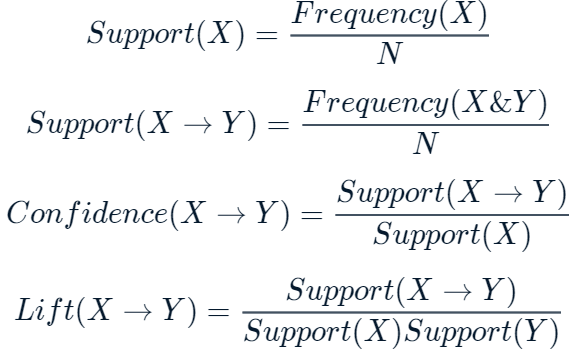

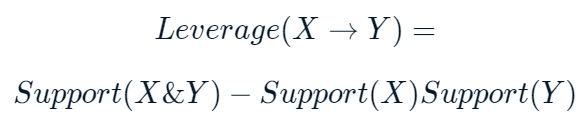

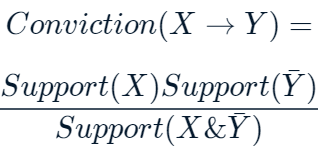

In [23]:
# {Fiction--History}
# Compute support for Potter AND Hunger
supportPH = np.logical_and(onehot['Fiction'], onehot['History']).mean()

# Compute support for Potter
supportP = onehot['Fiction'].mean()

# Compute support for NOT Hunger
supportnH = 1.0 - onehot['History'].mean()

# Compute support for Potter and NOT Hunger
supportPnH = supportP - supportPH

# Compute and print conviction for Potter -> Hunger
conviction = supportP * supportnH / supportPnH
print("Conviction: %.2f" % conviction)

Conviction: 0.75


In [26]:
def conviction(antecedent, consequent):
# Compute support for antecedent AND consequent
    supportAC = np.logical_and(onehot[antecedent], onehot[consequent]).mean()

# Compute support for antecedent
    supportA = onehot[antecedent].mean()

# Compute support for NOT consequent
    supportnC = 1.0 - onehot[consequent].mean()

# Compute support for antecedent and NOT consequent
    supportAnC = supportA - supportAC

    # Return conviction
    return supportA * supportnC / supportAnC

In [29]:
#['Fiction', 'Poetry', 'Biography', 'History', 'Bookmark']

#[('Fiction', 'Poetry'), ('Fiction', 'Biography'), ('Fiction', 'History'), ('Fiction', 'Bookmark'), ('Poetry', 'Fiction'), 
# ('Poetry', 'Biography'), ('Poetry', 'History'), ('Poetry', 'Bookmark'), ('Biography', 'Fiction'), ('Biography', 'Poetry'), 
# ('Biography', 'History'), ('Biography', 'Bookmark'), ('History', 'Fiction'), ('History', 'Poetry'), ('History', 'Biography'), 
#('History', 'Bookmark'), ('Bookmark', 'Fiction'), ('Bookmark', 'Poetry'), ('Bookmark', 'Biography'), ('Bookmark', 'History')]

# Compute conviction for Fiction -> Poetry and Poetry -> Fiction
convictionFP = conviction('Fiction', 'Poetry')
convictionPF = conviction('Poetry', 'Fiction')

# Compute conviction for Fiction -> Biography and Biography -> Fiction
convictionFB = conviction('Fiction', 'Biography')
convictionBF = conviction('Biography', 'Fiction')

# Compute conviction for Fiction -> History and History -> Fiction
convictionFH = conviction('Fiction', 'History')
convictionHF = conviction('History', 'Fiction')

# Print results
print('Biography -> Fiction: ', convictionBF)
print('Poetry -> Fiction: ', convictionHF)

Biography -> Fiction:  0.7474747474747474
Poetry -> Fiction:  0.7474747474747474


#### Association and dissociation
So far, we've talked exclusively about measures of association. But what about dissociation? What if reading one book predicts that an individual will not read another?

#### Introduction to Zhang's metric
It is bounded from below by -1 and bounded from above by 1. A value of 1 indicates perfect association. Negative 1 indicates perfect dissociation. Zhang's metric is comprehensive in the sense that it measures both association and dissociation. It is also interpretable and has a definition in terms of simpler metrics.

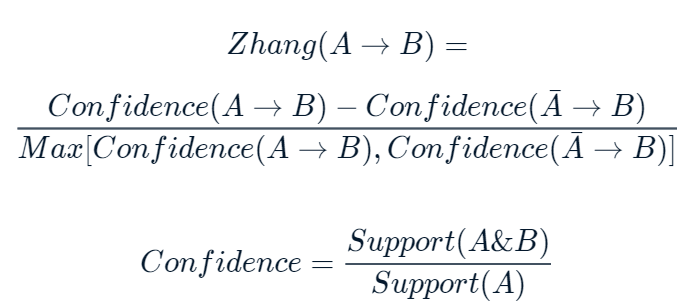

#### Defining Zhang's metric
Zhang's metric is defined as the difference between the confidence metrics of "if A then B" and "if NOT A then B," divided by the maximum of the confidence of "if A then B" and of "if NOT A then B." Let's unpack that slowly, starting with the numerator. First, we compute the confidence metric for the rule "if A then B," which measures the degree of association. And second, we subtract from that the confidence of "if NOT A then B," which means the dissociation between A and B. Both numbers will be non-negative. Finally, we divide by the maximum of the two confidence measures we computed. This will ensure that the value of the metric is never smaller than -1 and never larger than 1.

#### Constructing Zhang's metric using support
When we construct Zhang's metric, we'll actually use a simpler form, which exclusively entails support calculations. In the version above, the numerator is given as the support of A and B less the product of the support of A and support of B. The denominator is the max of the support of A and B, multiplied by one minus the support of A, and the support of A multiplied by the support of B minus the support of A and B.

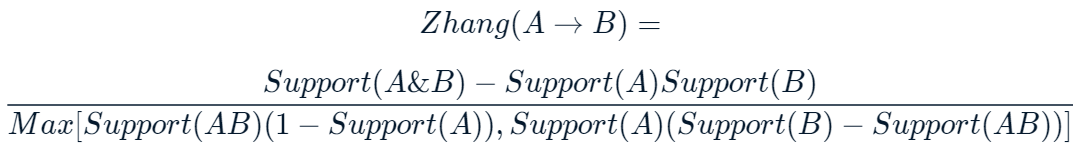

#### Computing Zhang's metric
Let's say we decide to use Zhang's metric as a way to order our client's ebook site. We'll start with a test using The Hobbit as an antecedent and Pride and Prejudice as the consequent. We'll compute the support for each book, followed by the support for both books.

We'll then compute the numerator as the support of both books, less the product of their individual supports. The expression for the denominator is more complicated. First, we compute the support of both books, multiplied by one minus the support of the Hobbit. Next, we compute the support of the Hobbit, multiplied by the support of Pride and Prejudice minus the support of both. Finally, we compute the maximum of the two and then divide the numerator by the denominator to get Zhang's metric. Printing, we can see that the value is slightly positive, indicating weak, but positive association.

In [33]:
#Compute Zhang's metric
# {History---> Fiction}

#Compute support
supportH= onehot['History'].mean()
supportF=onehot['Bookmark'].mean()

supportHF=np.logical_and(onehot['History'],onehot['Bookmark']).mean()

#compute numerator
num=supportHF-supportH*supportF

#compute denom
denom= max(supportHF*(1-supportH),supportH*(supportF-supportHF))
zhang=num/denom
print(zhang)

0.0


In [38]:
# Define a function to compute Zhang's metric
def zhang(antecedent, consequent):
    # Compute the support of each book
    supportA = antecedent.mean()
    supportC = consequent.mean()

    # Compute the support of both books
    supportAC = np.logical_and(antecedent, consequent).mean()

    # Complete the expressions for the numerator and denominator
    numerator = supportAC - supportA*supportC
    denominator = max(supportAC*(1-supportA), supportA*(supportC-supportAC))

    # Return Zhang's metric
    return numerator/denominator

In [42]:
# Define an empty list for Zhang's metric
zhangs_metric = []

# Loop over lists in itemsets
for itemset in rules:
    # Extract the antecedent and consequent columns
    antecedent = onehot[itemset[0]]
    consequent = onehot[itemset[1]]
    
    # Complete Zhang's metric and append it to the list
    zhangs_metric.append(zhang(antecedent, consequent))
    
# Print results
rules_df['zhang'] = zhangs_metric
print(rules_df)

   antecedents consequets  zhang
0      Fiction     Poetry   -1.0
1      Fiction  Biography   -1.0
2      Fiction    History   -1.0
3      Fiction   Bookmark    0.0
4       Poetry    Fiction   -1.0
5       Poetry  Biography   -1.0
6       Poetry    History   -1.0
7       Poetry   Bookmark    0.0
8    Biography    Fiction   -1.0
9    Biography     Poetry   -1.0
10   Biography    History   -1.0
11   Biography   Bookmark    0.0
12     History    Fiction   -1.0
13     History     Poetry   -1.0
14     History  Biography   -1.0
15     History   Bookmark    0.0
16    Bookmark    Fiction    NaN
17    Bookmark     Poetry    NaN
18    Bookmark  Biography    NaN
19    Bookmark    History    NaN


C:\Users\chaun2\AppData\Local\Temp/ipykernel_13844/1371212064.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return numerator/denominator


#### Overview of market basket analysis
Going forward, we will typically apply a three-step procedure whenever we do market basket analysis. We'll start off by generating a large set of rules. We'll then filter or prune those rules using metrics. Finally, we'll typically be left with more than one rule, forcing us to use some intuition and common sense before making a recommendation.

#### Multi-metric filtering
Multi-metric filtering is simply the application of filtering rules that depend on multiple metrics. For instance, we might require a rule to have a support of at least 0-point-02 and a Zhang's metric of at least 0-point-05. Alternatively, we might require a rule to have either a high confidence level or a high conviction level.

In [134]:
#We'll work with a new dataset of novelty gifts from an online store

gifts=pd.read_csv("C:/Users/chaun2/Desktop/Customer Segmentation/Market Basket Analysis/online_retail.csv")
gifts.head(10)

,InvoiceNo,StockCode,Description
0,562583,35637A,IVORY STRING CURTAIN WITH POLE
1,562583,35638A,PINK AND BLACK STRING CURTAIN
2,562583,84927F,PSYCHEDELIC TILE HOOK
3,562583,22425,ENAMEL COLANDER CREAM
4,562583,16008,SMALL FOLDING SCISSOR(POINTED EDGE)
5,562583,22232,JIGSAW TOADSTOOLS 3 PIECE
6,562584,84945,MULTI COLOUR SILVER T-LIGHT HOLDER
7,562584,21411,GINGHAM HEART DOORSTOP RED
8,562584,22083,PAPER CHAIN KIT RETROSPOT
9,562584,21621,VINTAGE UNION JACK BUNTING


In [135]:
# Exploring data
print("Unique Transactions: ",len(gifts['InvoiceNo'].unique()))
print("Unique Items : ", len(gifts['Description'].unique()))

# We have many transactions and many items; we nd to find useful rules.

Unique Transactions:  9709
Unique Items :  3461


#### Pruning and Aggregation
Pruning, removes items and rules with low support or poor performance along some other measure. Aggregation, groups items together into categories or aggregates. This reduces the market basket analysis problem to the identification of rules between categories of items. In our case, this might mean selecting the subset of items that are bags and boxes and aggregating them into bag and box categories.

#### Convert into One hot encoding format
So far, we've looked at the data in its original form, a DataFrame with one item per row. Before using this data, though, we would apply the standard pre-processing pipeline to convert it into one-hot encoded format. Notice that each column corresponds to an item and each row corresponds to a transaction. A column entry is labelled TRUE if the item appears in a transaction and FALSE otherwise.

In [136]:
#Keeping only two columns
gifts=gifts[['InvoiceNo','Description']]
print(gifts.head())
print(gifts.dtypes)

  InvoiceNo                          Description
0    562583      IVORY STRING CURTAIN WITH POLE 
1    562583        PINK AND BLACK STRING CURTAIN
2    562583                PSYCHEDELIC TILE HOOK
3    562583                ENAMEL COLANDER CREAM
4    562583  SMALL FOLDING SCISSOR(POINTED EDGE)
InvoiceNo      object
Description    object
dtype: object


In [137]:
#print(gifts['Description'].dtype)
#gifts['Description'] = gifts['Description'].astype(str)
gifts['Description']=gifts['Description'].apply(lambda x: str(x))
print(gifts.head())
print(gifts.dtypes)

  InvoiceNo                          Description
0    562583      IVORY STRING CURTAIN WITH POLE 
1    562583        PINK AND BLACK STRING CURTAIN
2    562583                PSYCHEDELIC TILE HOOK
3    562583                ENAMEL COLANDER CREAM
4    562583  SMALL FOLDING SCISSOR(POINTED EDGE)
InvoiceNo      object
Description    object
dtype: object


In [138]:
gifts_agg=pd.DataFrame(gifts.groupby('InvoiceNo')['Description'].apply(lambda x: x.values.tolist())).reset_index(drop=True)

print(gifts_agg.head())
print(type(gifts_agg))
print(gifts_agg.dtypes)

                                         Description
0  [DOORMAT RED RETROSPOT, DOORMAT WELCOME SUNRIS...
1  [SET OF 6 SPICE TINS PANTRY DESIGN, PANTRY WAS...
2  [BIRTHDAY PARTY CORDON BARRIER TAPE, ICE CREAM...
3  [VINTAGE GLASS T-LIGHT HOLDER, SET/6 BEAD COAS...
4  [PARTY CHARMS 50 PIECES, PACK OF 6 LARGE FRUIT...
<class 'pandas.core.frame.DataFrame'>
Description    object
dtype: object


In [139]:
#convert DF into list of strings
product_list=list(gifts_agg['Description'])
print(product_list[0:2])

[['DOORMAT RED RETROSPOT', 'DOORMAT WELCOME SUNRISE', 'DOORMAT MULTICOLOUR STRIPE', 'PACK OF 72 SKULL CAKE CASES', 'PACK OF 60 PINK PAISLEY CAKE CASES', 'PACK OF 60 MUSHROOM CAKE CASES', 'PACK OF 72 RETROSPOT CAKE CASES', '72 SWEETHEART FAIRY CAKE CASES', '60 TEATIME FAIRY CAKE CASES', 'SET OF 36 PAISLEY FLOWER DOILIES', 'SET OF 36 MUSHROOM PAPER DOILIES', 'SET OF 72 SKULL PAPER  DOILIES', 'SET/10 BLUE POLKADOT PARTY CANDLES', 'SET/10 PINK POLKADOT PARTY CANDLES', 'SET/10 IVORY POLKADOT PARTY CANDLES', 'SET/10 RED POLKADOT PARTY CANDLES'], ['SET OF 6 SPICE TINS PANTRY DESIGN', 'PANTRY WASHING UP BRUSH', 'SET OF 36 TEATIME PAPER DOILIES', 'SET OF 3 CAKE TINS PANTRY DESIGN ', 'SET OF 4 PANTRY JELLY MOULDS', 'TEA TIME DES TEA COSY', 'SET 2 PANTRY DESIGN TEA TOWELS', ' SET 2 TEA TOWELS I LOVE LONDON ', 'PARTY CONES CANDY ASSORTED', 'PINK HAPPY BIRTHDAY BUNTING', '3 TRADITIONAl BISCUIT CUTTERS  SET', 'PAPER BUNTING COLOURED LACE', 'COTTON APRON PANTRY DESIGN', 'PARTY CONES CANDY TREE DECORA

In [140]:
# generate rules with itertools
from itertools import permutations 
#extract unique items
flattened= [str(item) for product in product_list for item in product]
#flatten the list of lists into list of items
item=list(set(flattened))
#with set we identify the new items
print(item[0:10])

['LETTER "I" BLING KEY RING', 'DANISH ROSE UMBRELLA STAND', 'WRAP ALPHABET DESIGN', 'POLKA DOT RAFFIA FOOD COVER', 'JINGLE BELLS TREE DECORATION', 'GREETING CARD,SQUARE, DOUGHNUTS', 'ASSORTED COLOUR LIZARD SUCTION HOOK', 'PINK CANDYSTUFT ARTIFICIAL FLOWER', 'EDWARDIAN PARASOL BLACK', 'CREAM SWEETHEART MINI CHEST']


In [141]:
print(type(item[10]))

<class 'str'>


In [142]:
print(len(item))
print(type(item))

3461
<class 'list'>


In [148]:
#instantiate transaction encoder.. use fit method to identify the unique items  in the dataset
te=TransactionEncoder()
onehot_retail= te.fit(product_list).transform(product_list)
#use the transform method to construct an array of one-hot encoded transactions called onehot. Each column in onehot 
#corresponds to one of the nine items in our dataset. If the item is present in a transaction, this is encoded as TRUE. 
#Otherwise, it is FALSE. Finally, we'll use this array to construct a DataFrame. We'll use the item names as column headers 
#and will recover them using the column underscore attribute of encoder.

#CONVERT one-encoded data into dataframe
onehot_retail=pd.DataFrame(onehot_retail, columns=encoder_retail.columns_)
    print(onehot_retail.head(2))
#eaxch column corresponds tto an item and each row corresponds to a transaction

    4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
0                           False                           False   
1                           False                           False   

    DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK   NINE DRAWER OFFICE TIDY  \
0               False                         False                     False   
1               False                         False                     False   

    OVAL WALL MIRROR DIAMANTE    RED SPOT GIFT BAG LARGE  \
0                        False                     False   
1                        False                     False   

    SET 2 TEA TOWELS I LOVE LONDON    SPACEBOY BABY GIFT SET  \
0                             False                    False   
1                              True                    False   

    TRELLIS COAT RACK  ...  wet boxes  wet pallet  wet rusty   wet?  \
0               False  ...      False       False      False  False   
1               False  ...      

In [170]:
print(onehot_retail.columns)

Index([' 4 PURPLE FLOCK DINNER CANDLES', ' 50'S CHRISTMAS GIFT BAG LARGE',
       ' DOLLY GIRL BEAKER', ' I LOVE LONDON MINI BACKPACK',
       ' NINE DRAWER OFFICE TIDY', ' OVAL WALL MIRROR DIAMANTE ',
       ' RED SPOT GIFT BAG LARGE', ' SET 2 TEA TOWELS I LOVE LONDON ',
       ' SPACEBOY BABY GIFT SET', ' TRELLIS COAT RACK',
       ...
       'wet boxes', 'wet pallet', 'wet rusty', 'wet?', 'wrongly coded 20713',
       'wrongly coded 23343', 'wrongly coded-23343', 'wrongly marked',
       'wrongly marked 23343', 'wrongly marked carton 22804'],
      dtype='object', length=3461)


Aggregate the items into categories
Let's start by using list comprehensions to collect the column names related to bags and boxes. Notice that we have converted each column name to lowercase letters and checked whether the relevant string is present. Next, we select the columns in the DataFrame that correspond to the lists of bag and box column headers.

In [149]:
#select the column names for bags and boxes
bag_headers=[i for i in onehot_retail.columns if i.lower().find('bag')>=0]
box_headers=[i for i in onehot_retail.columns if i.lower().find('box')>=0]

#identify columns headers
bags=onehot_retail[bag_headers]
box=onehot_retail[box_headers]

print(bags)

       50'S CHRISTMAS GIFT BAG LARGE   RED SPOT GIFT BAG LARGE  \
0                              False                     False   
1                              False                     False   
2                              False                     False   
3                              False                     False   
4                              False                     False   
...                              ...                       ...   
9704                           False                     False   
9705                           False                     False   
9706                           False                     False   
9707                           False                     False   
9708                           False                     False   

      50'S CHRISTMAS PAPER GIFT BAG  AIRLINE BAG VINTAGE JET SET BROWN  \
0                             False                              False   
1                             False                        

In [150]:
#Aggregate the data
#We then sum across the columns to check whether at least one item in the transaction is a bag or box.
bags= (bags.sum(axis=1)>0.0).values
box= (box.sum(axis=1)>0.0).values
print(bags)

[False False  True ... False False False]


Finally, we use the vertical stack method of numpy to merge bags and boxes into a single array. We then pass that array, along with a list of column names, to a pandas DataFrame.

In [151]:
#add results to DF
aggregated= pd.DataFrame(np.vstack([bags,box]).T,columns=['bags','box'])
print(aggregated.head())

    bags    box
0  False  False
1  False   True
2   True   True
3   True  False
4  False  False


#### Market basket analysis with aggregates
The standard aggregation process works as follows. First, items are mapped to categories, as we've done. Next, we compute metrics, allowing us to identify useful rules. We can, for instance, compute the support metric by applying the mean method to the DataFrame.

#### Apriori Algorithm
Apriori algorithm will help us reduce the complexity of large datasets by eliminating low support itemsets.

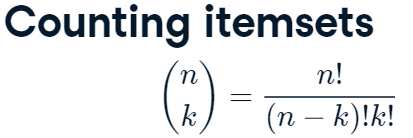

As we'll see soon, the Apriori algorithm prunes itemsets, rather than association rules. There are fewer itemsets than rules, but the number is still enormous. 

The Apriori algorithm is structured around the idea that we should retain items that are frequent -- that is, exceed some minimal level of support. The Apriori principle states that subsets of frequent sets must also be frequent. The Apriori algorithm uses this principle to retain frequent sets and prune those that cannot be said to be frequent. What does this mean in practice? Let's assume we're using the aggregated data and find that candles aren't frequent. That is, they fall below the minimum support. That means that candles and signs also aren't frequent. If candles and signs aren't frequent, then candles, signs, and boxes are not frequent. And so on. Computing support just once for candles allowed us to eliminate one fourth of all possible combinations without even enumerating them.

Apply the Apriori algorithm, which will take the minimum support value, along with an optional argument for maximum itemset length. Setting colnames to true will return the items in itemsets by name, rather than number. Printing the length of the output, we can see that we've gone from 6 trillion itemsets to just 3652.


In [162]:
# import apriori algorithm
from mlxtend.frequent_patterns import apriori, association_rules
print(onehot_retail.head(2))

In [160]:
freq_itemsets=apriori(onehot_retail, min_support=0.01, max_len=4, use_colnames=True)
#print number of itemsets
print(len(freq_itemsets))
print("==================================================================================================================")
print(freq_itemsets.head())

2179
    support                           itemsets
0  0.012257   ( 50'S CHRISTMAS GIFT BAG LARGE)
1  0.012772               ( DOLLY GIRL BEAKER)
2  0.013596           (10 COLOUR SPACEBOY PEN)
3  0.010506  (12 MESSAGE CARDS WITH ENVELOPES)
4  0.020805    (12 PENCIL SMALL TUBE WOODLAND)


In [161]:
print(freq_itemsets.tail())

       support                                           itemsets
2174  0.010403  (REGENCY TEA PLATE GREEN , REGENCY TEA PLATE R...
2175  0.010197  (JUMBO BAG VINTAGE DOILY , LUNCH BAG VINTAGE D...
2176  0.010815  (LUNCH BAG  BLACK SKULL., LUNCH BAG SUKI DESIG...
2177  0.010094  (LUNCH BAG  BLACK SKULL., LUNCH BAG SPACEBOY D...
2178  0.012154  (SET OF 3 WOODEN STOCKING DECORATION, SET OF 3...


In [169]:
print(len(onehot_retail.columns))
print(len(freq_itemsets))

3461
2179


We'll start by importing both apriori and association rules from mlxtend. We'll then import the one-hot encoded novelty gift data and apply the Apriori algorithm. We now have a DataFrame of frequent itemsets according to our choice of support value. The next step is to apply association rules, passing to it the frequent itemsets DataFrame, a metric, and a minimum threshold. We've selected a support threshold of 0-point-0, which will apply no pruning. Hence, we use non zero threshold for support for pruning. 

In [171]:
#compute association rules
rules=association_rules(freq_itemsets)
#print(rules)
print(len(rules))
print(rules.columns)

179
Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction'],
      dtype='object')


In [179]:
print(rules.head())

                       antecedents                 consequents  \
0                 (DOTCOM POSTAGE)        (SUKI  SHOULDER BAG)   
1         (REGENCY TEA PLATE PINK)  (REGENCY TEA PLATE GREEN )   
2       (REGENCY TEA PLATE GREEN )  (REGENCY TEA PLATE ROSES )   
3         (REGENCY TEA PLATE PINK)  (REGENCY TEA PLATE ROSES )   
4  (ROLL WRAP 50'S RED CHRISTMAS )  (ROLL WRAP 50'S CHRISTMAS)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.018848            0.022453  0.015347    0.814208  36.262120   
1            0.014214            0.018025  0.012772    0.898551  49.851594   
2            0.018025            0.020702  0.014523    0.805714  38.918806   
3            0.014214            0.020702  0.012154    0.855072  41.302978   
4            0.021114            0.034504  0.017201    0.814634  23.609800   

   leverage  conviction  
0  0.014923    5.261501  
1  0.012515    9.679473  
2  0.014149    5.040502  
3  0.011859    6.757153  
4  0

In [166]:
rules2=association_rules(freq_itemsets, metric= 'antecedent support', min_threshold=0.002)
print(len(rules2))

4328


#### advanced filtering techniques

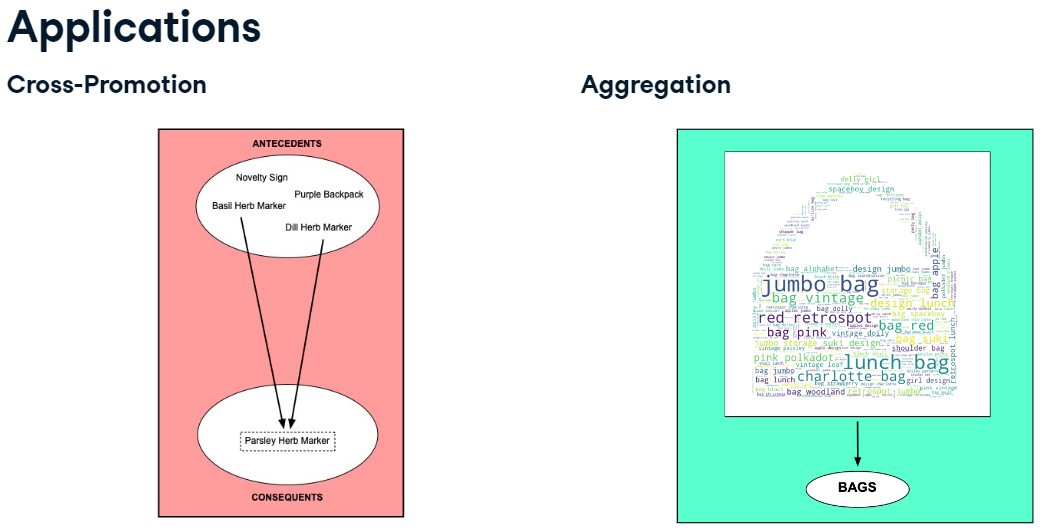

We'll consider two use cases: first, using cross-promotion to sell a targeted consequent; and second, using aggregation and Zhang's metric to select the layout for a new store.

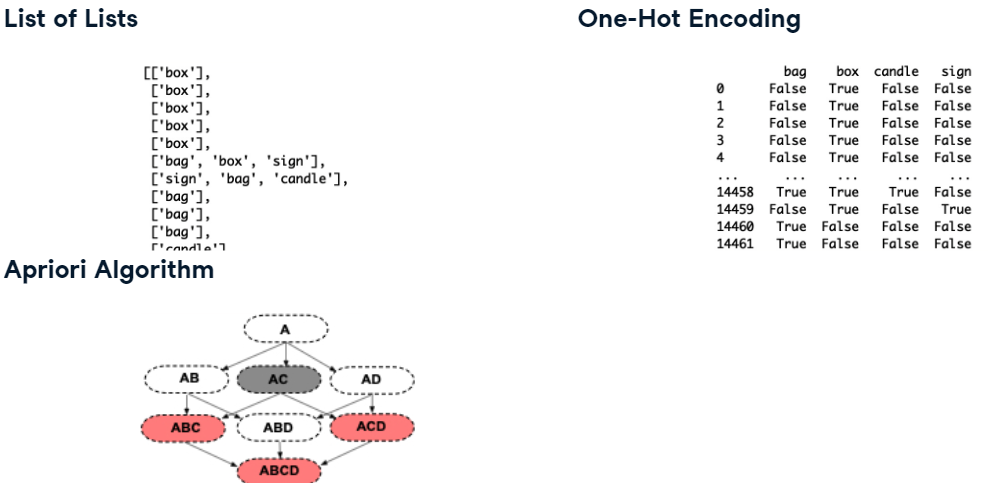



In [197]:
#We have 179 rules.. Now, let's say we show this list to the gift store manager and she tells us to cross-promote the herb marker thyme item.
print(rules['consequents'].tail())

174    (REGENCY TEA PLATE ROSES , GREEN REGENCY TEACU...
175                           (JUMBO BAG VINTAGE DOILY )
176                   (SET OF 3 WOODEN TREE DECORATIONS)
177                  (SET OF 3 WOODEN HEART DECORATIONS)
178                (SET OF 3 WOODEN STOCKING DECORATION)
Name: consequents, dtype: object


In [199]:
targeted_rules=rules[rules['consequents']=={'JUMBO BAG VINTAGE DOILY '}].copy()
print(targeted_rules)

                                           antecedents  \
103       (JUMBO BAG APPLES, LUNCH BAG VINTAGE DOILY )   
111  (LUNCH BAG VINTAGE DOILY , JUMBO BAG RED RETRO...   
113  (JUMBO BAG VINTAGE LEAF, LUNCH BAG VINTAGE DOI...   
175  (LUNCH BAG VINTAGE DOILY , LUNCH BAG RED RETRO...   

                    consequents  antecedent support  consequent support  \
103  (JUMBO BAG VINTAGE DOILY )            0.013390            0.068493   
111  (JUMBO BAG VINTAGE DOILY )            0.018025            0.068493   
113  (JUMBO BAG VINTAGE DOILY )            0.014729            0.068493   
175  (JUMBO BAG VINTAGE DOILY )            0.011639            0.068493   

      support  confidence       lift  leverage  conviction  
103  0.010712    0.800000  11.680000  0.009795    4.657534  
111  0.014832    0.822857  12.013714  0.013597    5.258506  
113  0.012154    0.825175  12.047552  0.011145    5.328219  
175  0.010197    0.876106  12.791150  0.009400    7.518591  


In [200]:
#We can start by restricting the set of rules to those that have "herb marker thyme" as the consequent. 

#targeted_rules=rules[rules['consequents']=={'SUKI  SHOULDER BAG'}].copy()
filtered_rules=targeted_rules[(targeted_rules['antecedent support']>0.01)& 
                             (targeted_rules['support']>0.009) & 
                             (targeted_rules['confidence']>0.85) & 
                             (targeted_rules['lift']>1.00)]

print(filtered_rules[['antecedents','consequents']])

                                           antecedents  \
175  (LUNCH BAG VINTAGE DOILY , LUNCH BAG RED RETRO...   

                    consequents  
175  (JUMBO BAG VINTAGE DOILY )  


In [201]:
print(filtered_rules['antecedents'])

175    (LUNCH BAG VINTAGE DOILY , LUNCH BAG RED RETRO...
Name: antecedents, dtype: object


In [181]:
#Visualization: Heatmap, scatterplot and Parallel coordinate plot